In [1]:
import sys
sys.path.insert(0, '../src')

import numpy as np
import roboscientist.equation.equation as rs_equation
from experiments import run_experiment

import roboscientist.equation.operators as rs_operators
from scipy.special import lambertw


import matplotlib.pyplot as plt

[[ 2.392859]
 [ 3.987968]
 [ 5.122973]
 [ 6.802601]
 [ 7.545995]
 [ 8.202622]
 [ 9.370277]
 [ 9.849015]
 [10.392087]
 [11.286035]
 [12.161154]]


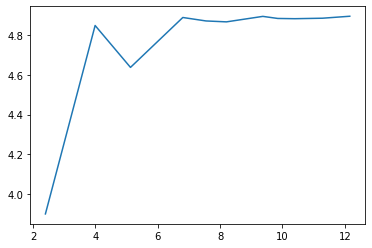

In [6]:
X = [
9.370277,
3.987968,
7.545995,
8.202622,
9.849015,
5.122973 ,
10.392087,
6.802601,
2.392859,
11.286035,
12.161154


    ]


X = np.sort(X)

X=np.array(X)[..., None]





print(X)

#noise = 1e-3 * np.random.rand(*X.shape)
y  = [
    3.899692,
    4.848482,
    4.637509,
    4.888823,
    4.871396,
    4.866795,
    4.894397,
    4.883973,
    4.882728,
    4.885172,
    4.895091


    ]

y=np.array(y)

plt.plot(X,y)

In [3]:
for i in range (5):
    noise = np.random.normal(X,0.004 * i * X)

#print(noise)
    X = np.append(X,noise)

    y = np.append(y, y)

X=np.array(X)[..., None]
print(X)



print(y)

[[ 2.392859  ]
 [ 3.987968  ]
 [ 5.122973  ]
 [ 6.802601  ]
 [ 7.545995  ]
 [ 8.202622  ]
 [ 9.370277  ]
 [ 9.849015  ]
 [10.392087  ]
 [11.286035  ]
 [12.161154  ]
 [ 2.392859  ]
 [ 3.987968  ]
 [ 5.122973  ]
 [ 6.802601  ]
 [ 7.545995  ]
 [ 8.202622  ]
 [ 9.370277  ]
 [ 9.849015  ]
 [10.392087  ]
 [11.286035  ]
 [12.161154  ]
 [ 2.39120859]
 [ 3.98534749]
 [ 5.15587474]
 [ 6.78518896]
 [ 7.5505365 ]
 [ 8.19098804]
 [ 9.30653271]
 [ 9.83749889]
 [10.47433893]
 [11.29979316]
 [12.15085456]
 [ 2.39491183]
 [ 4.01863095]
 [ 5.12115043]
 [ 6.79729693]
 [ 7.5308837 ]
 [ 8.16734847]
 [ 9.33049928]
 [ 9.84657332]
 [10.39638323]
 [11.23059714]
 [12.18975401]
 [ 2.38305013]
 [ 3.98916205]
 [ 5.19115696]
 [ 6.77567189]
 [ 7.54841912]
 [ 8.18198763]
 [ 9.36131023]
 [ 9.75570368]
 [10.30232198]
 [11.30210355]
 [12.10390006]
 [ 2.41402232]
 [ 3.95088014]
 [ 5.12988464]
 [ 6.80445964]
 [ 7.48668898]
 [ 8.25932407]
 [ 9.36329679]
 [ 9.90668822]
 [10.55927982]
 [11.32445717]
 [12.14855515]
 [ 2.38526

In [7]:
def get_offsprings(list_of_tokens, idx):
    if list_of_tokens[idx] in rs_operators.OPERATORS:
        open_nodes = rs_operators.OPERATORS[list_of_tokens[idx]].arity
    else:
        open_nodes = 0
    traversal = []
    for i, token in enumerate(list_of_tokens[idx + 1:]):
        if open_nodes == 0:
            break
        traversal.append(token)
        if token in rs_operators.OPERATORS:
            operator = rs_operators.OPERATORS[token]
            open_nodes += operator.arity - 1
        else:
            open_nodes -= 1

    return traversal

def predicate(list_of_tokens, chek = False):

        
#    if list_of_tokens[0] == 'sub':
 #       left, right = get_sub_trees_of_binary(list_of_tokens, 0)
  #      if right not in rs_operators.FLOAT_CONST or lef !='mul':
   #             return False

  #if  'X**-2' not in list_of_tokens:
   #   return False
    
    
#    if 'cos**2' not in list_of_tokens and 'sin**2' not in list_of_tokens :
 #       return False
    

    for i, token in enumerate(list_of_tokens):
        offsprings = get_offsprings(list_of_tokens, i)      
        if token == 'sin**2' or token == 'cos**2'  or token == 'exp' or token == 'log' or token == 'log**2' or token == 'X**-2' or token == 'OSCL' or token == 'OSCE':
            if 'sin**2' in offsprings or 'cos**2' in offsprings or 'exp' in offsprings or 'log' in offsprings or 'log**2' in offsprings or 'X**-2' in offsprings or 'OSCL' in offsprings or 'OSCE' in offsprings:
                return False
         
            
    return True


In [8]:
solver = run_experiment(X, y,
        functions=['add', 'sub', 'mul', 'div','pow2','exp','log','cos','sin'],
        free_variables=['x1'],
        wandb_proj='SEGVAE',
        project_name='Mo_S2_Mo_S_d_15p_nise_add_sub_mul_div_exp_pow2_log_cos_sin_100',
        constants=[],
        float_constants=rs_operators.FLOAT_CONST,
        #float_constants=None,
        epochs=100,
        n_formulas_to_sample=5000,
        max_formula_length=12,
        formula_predicate=predicate,
        #true_formula=rs_equation.Equation(true_func),
        latent=128,
        lstm_hidden_dim=64,
        device='cuda',
        train_size=50000,
        log_intermediate_steps=True,
        pretrain_path=None)

wandb: wandb version 0.12.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


===== START PRETRAIN =====
	[training] batches count: 196
	[training] loss: 21.060, rec loss: 20.986, kl: 0.149
	[validation] loss: 17.564, rec loss: 17.552, kl: 0.025
	[training] batches count: 196
	[training] loss: 18.549, rec loss: 18.535, kl: 0.027
	[validation] loss: 16.806, rec loss: 16.796, kl: 0.020
	[training] batches count: 196
	[training] loss: 18.013, rec loss: 17.997, kl: 0.033
	[validation] loss: 16.528, rec loss: 16.508, kl: 0.039
	[training] batches count: 196
	[training] loss: 17.848, rec loss: 17.807, kl: 0.082
	[validation] loss: 16.458, rec loss: 16.392, kl: 0.131
	[training] batches count: 196
	[training] loss: 17.749, rec loss: 17.656, kl: 0.186
	[validation] loss: 16.295, rec loss: 16.179, kl: 0.232
	[training] batches count: 196
	[training] loss: 17.667, rec loss: 17.519, kl: 0.297
	[validation] loss: 16.241, rec loss: 16.058, kl: 0.367
	[training] batches count: 196
	[training] loss: 17.598, rec loss: 17.393, kl: 0.409
	[validation] loss: 16.226, rec loss: 15.9

	[training] batches count: 2
	[training] loss: 17.207, rec loss: 14.728, kl: 4.960
	[validation] loss: 16.731, rec loss: 14.203, kl: 5.055
	[training] batches count: 2
	[training] loss: 16.705, rec loss: 14.226, kl: 4.959
	[validation] loss: 16.196, rec loss: 13.676, kl: 5.041
	[training] batches count: 2
	[training] loss: 16.613, rec loss: 14.123, kl: 4.980
	[validation] loss: 16.187, rec loss: 13.662, kl: 5.050
	[training] batches count: 2
	[training] loss: 16.353, rec loss: 13.887, kl: 4.932
	[validation] loss: 16.370, rec loss: 13.923, kl: 4.893
	[training] batches count: 2
	[training] loss: 17.328, rec loss: 14.822, kl: 5.013
	[validation] loss: 16.963, rec loss: 14.378, kl: 5.171
	[training] batches count: 2
	[training] loss: 17.232, rec loss: 14.678, kl: 5.109
	[validation] loss: 16.784, rec loss: 14.260, kl: 5.048
	[training] batches count: 2
	[training] loss: 17.449, rec loss: 14.918, kl: 5.062
	[validation] loss: 16.939, rec loss: 14.313, kl: 5.253
	[training] batches count: 

	[training] batches count: 1
	[training] loss: 12.141, rec loss: 10.496, kl: 3.290
	[validation] loss: 11.933, rec loss: 10.272, kl: 3.323
	[training] batches count: 1
	[training] loss: 12.231, rec loss: 10.596, kl: 3.271
	[validation] loss: 11.846, rec loss: 10.181, kl: 3.329
	[training] batches count: 1
	[training] loss: 11.977, rec loss: 10.336, kl: 3.281
	[validation] loss: 11.680, rec loss: 10.033, kl: 3.294
	[training] batches count: 1
	[training] loss: 12.186, rec loss: 10.568, kl: 3.236
	[validation] loss: 11.585, rec loss: 9.955, kl: 3.260
	[training] batches count: 2
	[training] loss: 13.680, rec loss: 11.925, kl: 3.512
	[validation] loss: 13.646, rec loss: 11.852, kl: 3.587
	[training] batches count: 1
	[training] loss: 11.924, rec loss: 10.295, kl: 3.258
	[validation] loss: 11.542, rec loss: 9.912, kl: 3.260
	[training] batches count: 1
	[training] loss: 11.621, rec loss: 10.002, kl: 3.238
	[validation] loss: 11.525, rec loss: 9.916, kl: 3.218
	[training] batches count: 1
	

In [8]:
best_idx = np.argmin(solver.stats.last_n_best_mses)
equations = np.array(solver.stats.last_n_best_formulas)
eq = rs_equation.Equation(equations[best_idx].split())

print('Raw equation in prefix notation: ', equations[best_idx])
print('Equation in traditional notation: ', eq.repr())

Raw equation in prefix notation:  sub 5.0 sin**2 sub 6.0 div pow2 div 4.0 x1 x1
Equation in traditional notation:  (5.0 - (sin**2((6.0 - (((4.0 / x1)^2) / x1)))))


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
distance= np.linspace(min(X), max(X))

#arg = 4.0 * (distance - 2.0)
#plt.plot(arg)
#print(arg)

#def oscl(arg):
 #   return np.cos(arg) * np.cos(arg) * np.log(arg) * np.log(arg) / arg
    
#print(oscl(distance))

#Energy = (5.0 - ((np.cos((((10.0 + 1.0) / distance) - 5.0)))**2 / (np.log(distance)**2)))


Energy = (5.0 - ((np.sin((9.0 + distance)))**2 / (np.log(distance))**2))

(4.0 + (cos**2(((2.0 + ((2.0 + ((9.0^2) / (x1^2))) / x1)) / 7.0))))
#5.0 - ((OSCL((4.0 * (x1 - 2.0))))^2)

print(distance)
#plt.plot(distance, Energy)
                 
print(Energy)                
plt.plot(distance,Energy)



ax.set_ylabel('Formation Energy per site (eV)'),
ax.set_xlabel('Distance between defects')
ax.set_title('Mo_S_deffects')
        
X1 = [
9.370277,
3.987968,
7.545995,
8.202622,
9.849015,
5.122973 ,
10.392087,
6.802601,
2.392859,
11.286035,
12.161154


    ]

X1 = np.sort(X1)
        
y1  = [
    3.899692,
    4.848482,
    4.637509,
    4.888823,
    4.871396,
    4.866795,
    4.894397,
    4.883973,
    4.882728,
    4.885172,
    4.895091


    ]  

plt.plot(X1,y1)